<a href="https://colab.research.google.com/github/shreyagupta2405/Handwritten-digit-Recognition/blob/main/Handwritten_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt

 import keras

 from keras.datasets import mnist
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Flatten
 from keras.layers import Conv2D, MaxPooling2D


In [ ]:
# get the data and pre-process it

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def plot_input_img(i):
  plt.imshow(X_train[i], cmap='binary')
  plt.title(y_train[i])
  # plt.axes('off')
  plt.show()

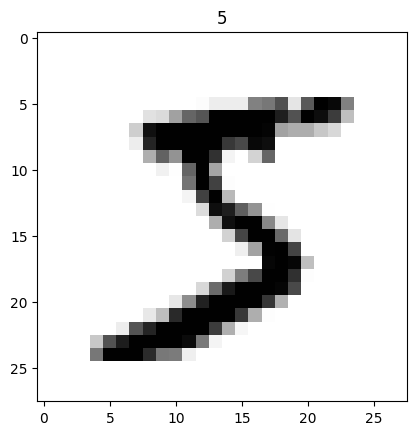

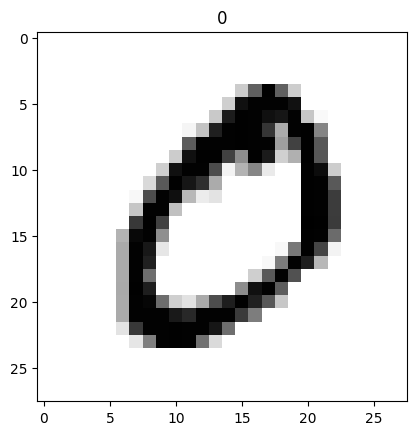

In [ ]:
for i in range(2):
  plot_input_img(i)

Pre-process the images

In [ ]:
# normalising the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# reshape/ expland the dim of images to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert classes to one-hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [ ]:
# model training

his = model.fit(X_train, y_train, epochs = 50, validation_split=0.3, callbacks = cb)

Epoch 1/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8510 - loss: 0.4783
Epoch 1: val_accuracy improved from -inf to 0.97750, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.8511 - loss: 0.4778 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 2/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9755 - loss: 0.0774
Epoch 2: val_accuracy improved from 0.97750 to 0.98239, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9755 - loss: 0.0774 - val_accuracy: 0.9824 - val_loss: 0.0572
Epoch 3/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9816 - loss: 0.0562
Epoch 3: val_accuracy improved from 0.98239 to 0.98389, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9816 - loss: 0.0562 - val_accuracy: 0.9839 - val_loss: 0.0509
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9854 - loss: 0.0464
Epoch 4: val_accuracy improved from 0.98389 to 0.98711, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9854 - loss: 0.0464 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 5/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9882 - loss: 0.0367
Epoch 5: val_accuracy improved from 0.98711 to 0.98778, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9910 - loss: 0.0291
Epoch 6: val_accuracy did not improve from 0.98778
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9863 - val_loss: 0.0451
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9915 - loss: 0.0262
Epoch 7: val_accuracy improved from 0.98778 to 0.98817, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9882 - val_loss: 0.0435
Epoch 8/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9923 - loss: 0.0240
Epoch 8: val_accuracy improved from 0.98817 to 0.98911, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9891 - val_loss: 0.0416
Epoch 9/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9935 - loss: 0.0199
Epoch 9: val_accuracy improved from 0.98911 to 0.98967, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.9897 - val_loss: 0.0384
Epoch 9: early stopping


In [ ]:
model_S = keras.models.load_model("/content/bestmodel.h5")

In [ ]:
score = model_S.evaluate(X_test, y_test)

print(f"The model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9885 - loss: 0.0376
The model accuracy is 0.9902999997138977
